<a href="https://colab.research.google.com/github/parthnaik13/NYRA/blob/main/1_1_NYRA_EDA_general.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA for NYRA Analytics
https://www.kaggle.com/competitions/big-data-derby-2022/overview

## Setup
* Mount google drive to load competition data
* Load necessary python libs and print out versions
* Set pandas df display options

In [3]:
# Mount google drive to access data files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import necessary libs and print out their versions
import numpy as np
np.random.seed(7)

import pandas as pd
pd.set_option('display.max_columns', None) # Display all dataframe columns

import matplotlib
import matplotlib.pyplot as plt

print(f'numpy version - {np.__version__}')
print(f'pandas version - {pd.__version__}')
print(f'matplotlib version - {matplotlib.__version__}')

numpy version - 1.21.6
pandas version - 1.3.5
matplotlib version - 3.2.2


## NYRA start table

EDA for the NYRA start table

In [5]:
# Load the start table from the gdrive mount point
nyra_start_df = pd.read_csv('/content/drive/MyDrive/NYRA_Data/nyra_start_table.csv')
# Shape of the df
print(f'Shape of the df - {nyra_start_df.shape}')
# A look at the dataframe
nyra_start_df.head(5)

Shape of the df - (14915, 7)


,track_id,race_date,race_number,program_number,weight_carried,jockey,odds
0,AQU,2019-01-01,1,1,123,Dylan Davis,130
1,AQU,2019-01-01,1,2,120,Junior Alvarado,295
2,AQU,2019-01-01,1,3,118,Jose Lezcano,180
3,AQU,2019-01-01,1,4,123,Jomar Garcia,1280
4,AQU,2019-01-01,1,5,118,Manuel Franco,1150


### Column descriptions

Pulled from the competition page

Table contains data for horses/jockeys and races

* track_id - 3 character id for the track the race took place at. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga.
* race_date - date the race took place. YYYY-MM-DD.
* race_number - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.
* program_number - Program number of the horse in the race passed as 3 characters. Should remain 3 characters as it isn't limited to just numbers. Is essentially the unique identifier of the horse in the race.
* weight_carried - An integer of the weight carried by the horse in the race.
* jockey - Name of the jockey on the horse in the race. 50 character max.
* odds - Odds to win the race passed as an integer. Divide by 100 to derive the odds to 1. Example - 1280 would be 12.8-1.

### Inspect & fix datatypes

In [6]:
# Look at the column dtypes for the data
nyra_start_df.dtypes

track_id          object
race_date         object
race_number        int64
program_number    object
weight_carried     int64
jockey            object
odds               int64
dtype: object

In [7]:
# Assign proper datatypes wherever necessary
# race_date as datetime col
nyra_start_df['race_date'] = pd.to_datetime(nyra_start_df['race_date'])
# race_number as a int/numeric col
nyra_start_df['race_number'] = pd.to_numeric(nyra_start_df['race_number'])

### Look at completeness of the df

In [8]:
# Look for nulls across columns
nyra_start_df.isnull().sum()

track_id          0
race_date         0
race_number       0
program_number    0
weight_carried    0
jockey            0
odds              0
dtype: int64

### Look at the data volume
* Min and max race dates
* Number of races that took place
* Distribution of those counts across race tracks
* Number of unique jockeys
* Number of unique horses competing
* Distribution of races across horses

In [9]:
# Time span for the race data
min_race_date = np.min(nyra_start_df['race_date'])
max_race_date = np.max(nyra_start_df['race_date'])

print(f'Min race date - {min_race_date}\nMax race date - {max_race_date}')

Min race date - 2019-01-01 00:00:00
Max race date - 2019-12-31 00:00:00


In [10]:
# Number of races that took place
# Grouping by track_id, race_date and counting unique race numbers
temp = nyra_start_df.groupby(['track_id', 'race_date']).agg({'race_number':'nunique'}).reset_index()
# print(temp.head(5))
total_races = sum(temp['race_number'])
print(f'Total # of races - {total_races}')

Total # of races - 2000


In [11]:
# Number of unique jockeys
temp = nyra_start_df['jockey'].nunique()
print(f'Number of unique jockeys - {temp}')

Number of unique jockeys - 178


In [12]:
# Number of unique horses (program)
temp = nyra_start_df['program_number'].nunique()
print(f'Number of unique horses - {temp}')

Number of unique horses - 20


### Race data across cuts
* Venues
* Horses
* Jockeys

In [13]:
# Distrbution of races across program_numbers (horses)
temp = nyra_start_df.groupby(['track_id', 'race_date']).agg({'race_number':'nunique'}).reset_index()
# Group by track_id and sum race_number to get counts across tracks
temp = temp.groupby('track_id').agg({'race_number' : 'sum'}).reset_index()
temp = temp.rename(columns = {'race_number' : 'race_count'})
temp['percent_of_races'] = (temp['race_count'] / 2000) * 100
temp

,track_id,race_count,percent_of_races
0,AQU,825,41.25
1,BEL,772,38.60
2,SAR,403,20.15


In [14]:
# Distribution of races across horses
temp = nyra_start_df.groupby(['program_number']).agg({'race_number':'count'}).reset_index()
temp = temp.rename(columns = {'race_number' : 'race_count'})
temp['percent_of_races'] = (temp['race_count'] / 2000) * 100
temp

,program_number,race_count,percent_of_races
0,1,1708,85.40
1,10,535,26.75
2,11,333,16.65
3,12,201,10.05
4,13,77,3.85
5,14,44,2.20
6,15,24,1.20
7,16,10,0.50
8,1A,164,8.20
9,1X,1,0.05


In [15]:
# Distribution of races across jockeys
temp = nyra_start_df.groupby(['jockey']).agg({'race_number':'count'}).reset_index()
temp = temp.rename(columns = {'race_number' : 'race_count'})
temp['percent_of_races'] = (temp['race_count'] / 2000) * 100
# Sort by highest race count
temp = temp.sort_values('race_count', axis = 0, ascending = False)
temp

,jockey,race_count,percent_of_races
119,Manuel Franco,1274,63.70
42,Dylan Davis,1108,55.40
96,Jose Lezcano,990,49.50
103,Junior Alvarado,852,42.60
66,Irad Ortiz Jr.,802,40.10
...,...,...,...
35,Dana G. Whitney,1,0.05
97,Jose R. Betancourt,1,0.05
28,Christophe Soumillon,1,0.05
25,Charlie Amaro,1,0.05


### Distribution of the weight carried 

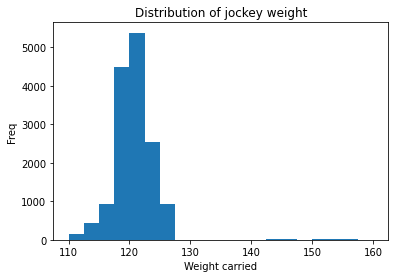

In [16]:
# Histogram for the weight carried
plt.hist(nyra_start_df['weight_carried'], bins = 20)
plt.xlabel('Weight carried')
plt.ylabel('Freq')
plt.title('Distribution of jockey weight')
plt.show()

### Exploring odds
* Convert odds to 1 (divide by 100)
* Distribution of odds
* Weight carried vs odds
* Horses having the highest avg odds
* Jockeys having the highest avg odds

Text(0.5, 1.0, 'Distribution of odds')

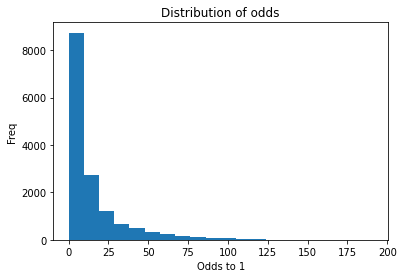

In [17]:
# Converting odds to out of 1
nyra_start_df['odds_to_1'] = nyra_start_df['odds'] / 100
plt.hist(nyra_start_df['odds_to_1'], bins = 20)
plt.xlabel('Odds to 1')
plt.ylabel('Freq')
plt.title('Distribution of odds')

  weight_bins  odds_to_1  race_number
0  (110, 115]  28.397818          825
1  (115, 117]  20.995287          679
2  (117, 120]  14.367923         6740
3  (120, 125]  13.067192         6253
4  (125, 130]  11.974052          343
5  (130, 140]   0.500000            1
6  (140, 150]  15.173171           41
7  (150, 160]   7.526562           32
8         nan  60.000000            1


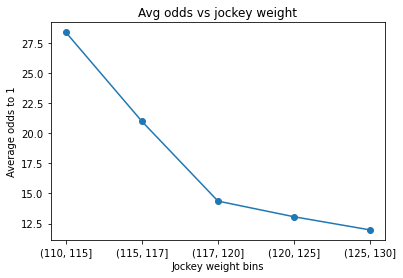

In [18]:
# Weight vs odds
# Creating weight buckets
nyra_start_df['weight_bins'] = pd.cut(nyra_start_df['weight_carried'],
                                      bins = [110, 115, 117, 120, 125, 130, 140, 150, 160])
# Convert weight_bins to str (for plotting purposes)
nyra_start_df['weight_bins'] = nyra_start_df['weight_bins'].astype(str)
# Get avg odds for jockey weight bins
temp = nyra_start_df.groupby('weight_bins').agg({'odds_to_1':'mean', 'race_number':'count'}).reset_index()
# View the df
print(temp)

# Plot weight_bins vs avg odds_to_1
plt.plot(temp['weight_bins'][:5], temp['odds_to_1'][:5], 'o-')
plt.xlabel('Jockey weight bins')
plt.ylabel('Average odds to 1')
plt.title('Avg odds vs jockey weight')
plt.show()

In [19]:
# Horses having highest avg odds
temp = nyra_start_df.groupby('program_number').agg({'odds_to_1':'mean'}).reset_index()
temp = temp.rename(columns = {'odds_to_1':'avg_odds'})
temp = temp.sort_values('avg_odds', axis = 0, ascending = False)
temp.head(10)

,program_number,avg_odds
4,13,22.370779
3,12,21.719652
5,14,20.964773
6,15,20.452083
1,10,20.425888
2,11,19.639790
9,1X,19.300000
19,9,18.086137
18,8,16.569231
16,6,15.243523


In [20]:
# Jockeys having highest avg odds
temp = nyra_start_df.groupby('jockey').agg({'odds_to_1':'mean'}).reset_index()
temp = temp.rename(columns = {'odds_to_1':'avg_odds'})
temp = temp.sort_values('avg_odds', axis = 0, ascending = False)
temp.head(10)

,jockey,avg_odds
58,Gavin Coetzee,84.000000
122,Martin Chuan,78.000000
143,Robbie G. Davis,74.625000
159,Talbert Howell,73.589286
10,Angel Cruz,73.000000
89,Jose A. Bracho,70.687500
162,Tomas B. Mejia,69.850000
32,Cristina Bonilla,67.150000
112,Leonardo Corujo,64.062500
27,Christian Santiago Reyes,61.125000


### Number of races per year for each horse

   program_number  race_count
0             1          1708
1             10          535
2             11          333
3             12          201
4             13           77
5             14           44
6             15           24
7             16           10
8             1A          164
9             1X            1
10            2          1715
11            2B           11
12            3          1743
13            3X            1
14            4          1748
15            5          1731
16            6          1652
17            7          1390
18            8          1066
19            9           761


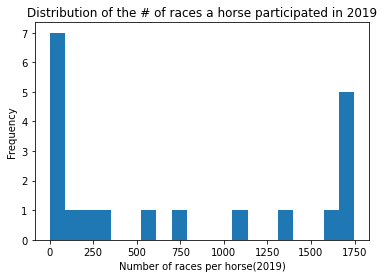

In [29]:
# Groupby program_number and count the number of races each horse participated in
temp = nyra_start_df.groupby('program_number').agg({'race_number':'count'}).reset_index()
temp = temp.rename(columns = {'race_number' : 'race_count'})
print(temp)

# A look at the distribution
plt.hist(temp['race_count'], bins = 20)
plt.xlabel('Number of races per horse(2019)')
plt.ylabel('Frequency')
plt.title('Distribution of the # of races a horse participated in 2019')
plt.show()

### EDA summary for NYRA start table
* Right off the bat we can see that there are a total of 2k races across 3 tracks AQU (48%), BEL (30%), SAR (20%) for 2019 (1 year's worth of race data)
* There are 20 unique horses which means that are quite a few horses which participate in 1000+ races i.e. more than 3 races per day each day of 2019!
* If there isn't proper spacing between these races it could lead to the horses being fatigued and hence affecting their performance on the track
<br>
<br>

### **One direction to explore would be** - Does avg rest period between races for a horse translate to better performance/winning/top x finish?

1. We can try to get at this question by using horse odds + avg rest features + weight carried to predict the probability that a horse will have a top x finish
(use of the track data to get finish positions of horses for races)

2. Another approach would be to get univariate plots of rest features vs avg speed for a horse across races (we can use the track data to extract this information)

## NYRA race table

This table is again at a race level, it has the track_id, race_date and race_number to uniquely identify a race and join to the other 2 dfs

Additonally it has race specific data like type of betting, time of day when the race started, course type and track condition

In [30]:
# Load the NYRA race data from the gdrive mount
nyra_race_df = pd.read_csv('/content/drive/MyDrive/NYRA_Data/nyra_race_table.csv')
# Shape of the dataframe
print(f'Shape of the df - {nyra_race_df.shape}')
# A look at the dataframe
nyra_race_df.head(10)

Shape of the df - (2000, 10)


,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250
2,AQU,2019-01-01,3,550,D,MY,54,MCL,35000,121
3,AQU,2019-01-01,4,900,D,MY,101,AOC,80000,150
4,AQU,2019-01-01,5,700,D,MY,60,ALW,64000,220
5,AQU,2019-01-01,6,600,D,MY,48,MCL,46000,251
6,AQU,2019-01-01,7,650,D,GD,36,AOC,67000,323
7,AQU,2019-01-01,8,800,D,GD,54,STK,150000,350
8,AQU,2019-01-01,9,600,D,GD,48,CLM,25000,420
9,AQU,2019-01-04,1,800,D,FT,54,MSW,68000,1250


A row count of 2000 confirms the findings from our NYRA start dataframe EDA in terms of the number of races in the dataset

### Column descriptions

Pulled from the Kaggle competition page

* track_id - 3 character id for the track the race took place at. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga.
* race_date - date the race took place. YYYY-MM-DD.
* race_number - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.
* distance_id - Distance of the race in furlongs passed as an integer. Example - 600 would be 6 furlongs.
* course_type - The course the race was run over passed as one character. M - Hurdle, D - Dirt, O - Outer turf, I - Inner turf, T - turf.
* track_condition - The condition of the course the race was run on passed as three characters. YL - Yielding, FM - Firm, SY - Sloppy, GD - Good, FT - Fast, MY - Muddy, SF - Soft.
* run_up_distance - Distance in feet of the gate to the start of the race passed as an integer.
* race_type - The classification of the race passed as as five characters. STK - Stakes, WCL - Waiver Claiming, WMC - Waiver Maiden Claiming, SST - Starter Stakes, SHP - Starter Handicap, CLM - Claiming, STR - Starter Allowance, AOC - Allowance Optionl Claimer, SOC - Starter Optional Claimer, MCL - Maiden Claiming, ALW - Allowance, MSW - Maiden Special Weight.
* purse - Purse in US dollars of the race passed as an money with two decimal places.
* post_time - Time of day the race began passed as 5 character. Example - 01220 would be 12:20.

### Inspect and fix dtypes

In [50]:
# Assign the right datatypes wherever necessary
# race_date as a datetime col
nyra_race_df['race_date'] = pd.to_datetime(nyra_race_df['race_date'])
# post_time as a datetime col
nyra_race_df['post_time'] = pd.to_datetime(nyra_race_df['post_time'], format= '%H%M').dt.time

### Look at the completeness of the dataframe


In [36]:
nyra_race_df.isnull().sum()

track_id           0
race_date          0
race_number        0
distance_id        0
course_type        0
track_condition    0
run_up_distance    0
race_type          0
purse              0
post_time          0
dtype: int64

### Look at the distribution of the race characterics
* distance_id
* course_type
* track_condition
* run_up_distance
* race_type
* purse
* post_time

[]

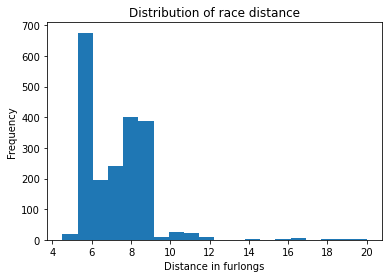

In [38]:
# Distance
plt.hist(nyra_race_df['distance_id'] / 100, bins = 20)
plt.xlabel('Distance in furlongs')
plt.ylabel('Frequency')
plt.title('Distribution of race distance')
plt.plot()

  course_type  race_count  percent_of_race
0           D        1351            67.55
1           I         249            12.45
2           M           9             0.45
3           O          67             3.35
4           T         324            16.20


[]

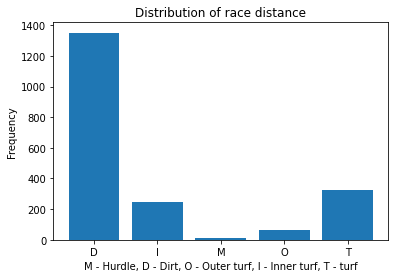

In [43]:
# Course type
temp = nyra_race_df.groupby('course_type').agg({'race_number':'count'}).reset_index()
temp = temp.rename(columns = {'race_number' : 'race_count'})
temp['percent_of_race'] = temp['race_count'] / 2000 * 100
print(temp)

plt.bar(temp['course_type'], temp['race_count'])
plt.xlabel('M - Hurdle, D - Dirt, O - Outer turf, I - Inner turf, T - turf')
plt.ylabel('Frequency')
plt.title('Distribution of race distance')
plt.plot()

  track_condition  race_count  percent_of_race
0             FM          455            22.75
1             FT          978            48.90
2             GD          253            12.65
3             MY           74             3.70
4             SF            3             0.15
5             SY          207            10.35
6             YL           30             1.50


[]

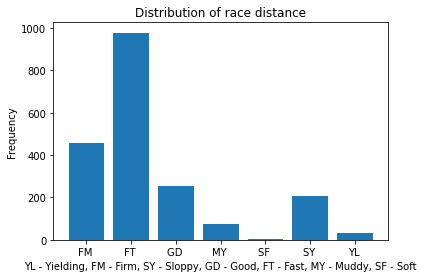

In [44]:
# Track condition
temp = nyra_race_df.groupby('track_condition').agg({'race_number':'count'}).reset_index()
temp = temp.rename(columns = {'race_number' : 'race_count'})
temp['percent_of_race'] = temp['race_count'] / 2000 * 100
print(temp)

plt.bar(temp['track_condition'], temp['race_count'])
plt.xlabel('YL - Yielding, FM - Firm, SY - Sloppy, GD - Good, FT - Fast, MY - Muddy, SF - Soft')
plt.ylabel('Frequency')
plt.title('Distribution of race distance')
plt.plot()

   race_type  race_count  percent_of_race
0        ALW         193             9.65
1        AOC         229            11.45
2        CLM         471            23.55
3        MCL         325            16.25
4        MSW         406            20.30
5        SHP           2             0.10
6        SOC          18             0.90
7        SST          10             0.50
8        STK         259            12.95
9        STR          77             3.85
10       WCL           9             0.45
11       WMC           1             0.05


[]

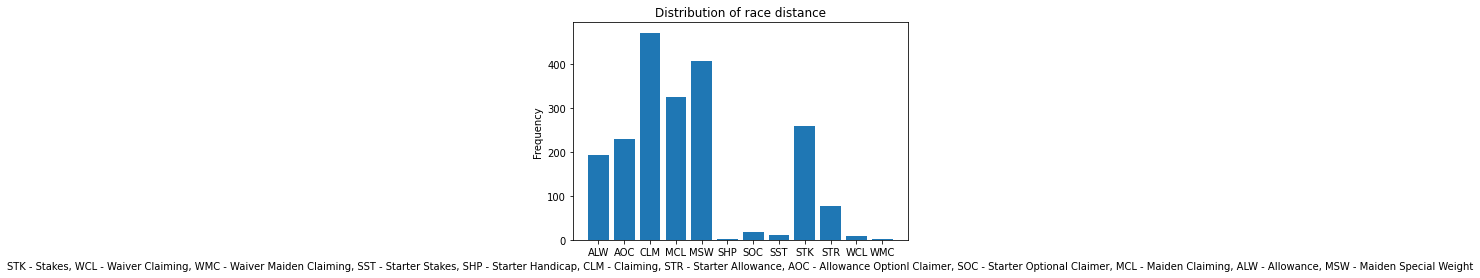

In [45]:
# Race type
temp = nyra_race_df.groupby('race_type').agg({'race_number':'count'}).reset_index()
temp = temp.rename(columns = {'race_number' : 'race_count'})
temp['percent_of_race'] = temp['race_count'] / 2000 * 100
print(temp)

plt.bar(temp['race_type'], temp['race_count'])
plt.xlabel('STK - Stakes, WCL - Waiver Claiming, WMC - Waiver Maiden Claiming, SST - Starter Stakes, SHP - Starter Handicap, CLM - Claiming, STR - Starter Allowance, AOC - Allowance Optionl Claimer, SOC - Starter Optional Claimer, MCL - Maiden Claiming, ALW - Allowance, MSW - Maiden Special Weight')
plt.ylabel('Frequency')
plt.title('Distribution of race distance')
plt.plot()

[]

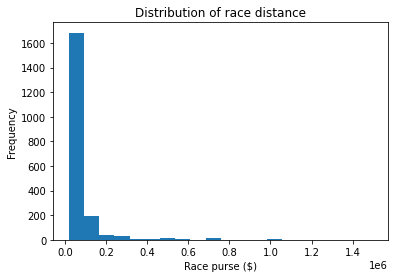

In [47]:
# Purse
plt.hist(nyra_race_df['purse'], bins = 20)
plt.xlabel('Race purse ($)')
plt.ylabel('Frequency')
plt.title('Distribution of race distance')
plt.plot()

In [53]:
# Post time
nyra_race_df['post_time'].describe()

count         2000
unique         358
top       13:00:00
freq            46
Name: post_time, dtype: object

# End of notebook